In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
import os

## Gathering Data
1. 'twitter_archive_enhanced.csv' (Manually downloading from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

2. 'image-predictions.tsv' obatined programmatically from the given url using requests library

3. 'tweet_json.txt' file obtained form the resources section of the project.

### 1. Gather` image-predictions.tsv` file form the url

In [2]:
# Download 'image-predictions.tsv' file from the link programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
with requests.Session() as s:
    response = s.get(url)
    if response:
        print('Requests get() method successful')
    else:
        print('Error has occurred')
#check if the encoding is in 'utf-8' or not
    print("Encoding of obtained content: ",response.headers['content-type'].split(';')[-1])
    with open(os.path.join(os.getcwd(), url.split('/')[-1]),'wb') as file:
        file.write(response.content)
        print("Writing of the content successful..!")

Requests get() method successful
Encoding of obtained content:   charset=utf-8
Writing of the content successful..!


In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t')

### 2. Read `twitter_archive_enhanced` csv file

In [4]:
# create dataframe of  'twitter-archive-enhanced' and 'image-predictions' and 'twitter-json' data
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv', delimiter=',')

### 3. Read `tweet_json` file into a dataframe

In [5]:
tweet_json = pd.read_json('tweet-json.txt', orient='records', lines=True)

## Assessment


### 1. `twitter_archive_enhanced`

In [6]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [8]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
938,753294487569522689,NaN,NaN,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iroh. He's in a predicament. 12/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798933969...,12,10,Iroh,None,None,None,None
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,None,None,None,None
324,834086379323871233,NaN,NaN,2017-02-21 17:04:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lipton. He's a West Romanian Snuggle P...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834086379...,12,10,Lipton,None,None,None,None


In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
print(twitter_archive_enhanced['text'][1042])
print(twitter_archive_enhanced['text'][2339])

When you're given AUX cord privileges from the back seat and accidentally start blasting an audiobook... both 10/10 https://t.co/gCCrY8P0K9
Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq


Many records of the tweet's columns: doggo, floofer, pupper, puppo , do not contain any value excpet 'None'. and they are string data type. They could be of category data type.

In [11]:
# Check for the duplication of records
twitter_archive_enhanced[twitter_archive_enhanced.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
# create a function to obtain value_counts of the columns
def count_values(col_names):
    if type(col_names) is str:
        return twitter_archive_enhanced[col_names].value_counts()
    if type(col_names) is list:
        doggy_data=[]
        for col in col_names:
            doggy_data.append(twitter_archive_enhanced[col].value_counts())
        return doggy_data

In [13]:
source_val_counts = count_values('source')
print(source_val_counts)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64


The `source` column contain redundant HTMl informations.

In [14]:
name_val_counts = count_values('name')
print(name_val_counts)

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
Buddy        7
Daisy        7
an           7
Bailey       7
Oscar        6
Dave         6
Milo         6
Stanley      6
Jax          6
Leo          6
Koda         6
Scout        6
Rusty        6
Jack         6
Bella        6
George       5
          ... 
Baron        1
Mitch        1
Maya         1
Mary         1
Jareld       1
Batdog       1
Edgar        1
Timmy        1
Mingus       1
Rueben       1
Theo         1
Clyde        1
Benny        1
Buddah       1
Tupawc       1
Tuco         1
Flash        1
Mike         1
Tiger        1
Taco         1
Chef         1
Bilbo        1
Murphy       1
Blipson      1
Ember        1
Shiloh       1
Pepper       1
Glacier      1
Norman       1
Fiji         1
Name: name, Length: 957, dtype: int64


 The `name` column contain wrong names or literary words/characters like 'a', 'Bo','the',and 'an' .

In [15]:
numer_val_counts = count_values('rating_numerator')
print(numer_val_counts)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64


In [16]:
# check the text and url in it of the index 1869
print(twitter_archive_enhanced.query('rating_numerator == 1')['text'][1869])

What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0


`rating_numerator` does not seem to contain any quality or tidy issues

In [17]:
denom_val_counts = count_values('rating_denominator')
print(denom_val_counts)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [18]:
twitter_archive_enhanced.query('rating_denominator == 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [19]:
print(twitter_archive_enhanced.query('rating_denominator == 11')['text'][1068]) 

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


The numerator and denominator contains the wrong values comparing with the `text` column. 9/11 refers to the event of plane crashes in New York but the true value is actually 14/10 (numerator/denominator) for the index 1068.

In [20]:
# Dog stages frequency counts
dog_stages = ["doggo", "floofer", "pupper", "puppo"]
dog_stages_val_counts = count_values(dog_stages)
print("Doggo's value counts: ", dog_stages_val_counts[0])
print("==================================================")
print("\nFloofer's value counts: ", dog_stages_val_counts[0])
print("==================================================")
print("\nPupper's value counts: ", dog_stages_val_counts[0])
print("==================================================")
print("\nPupper's value counts: ", dog_stages_val_counts[0])
print("==================================================")

Doggo's value counts:  None     2259
doggo      97
Name: doggo, dtype: int64

Floofer's value counts:  None     2259
doggo      97
Name: doggo, dtype: int64

Pupper's value counts:  None     2259
doggo      97
Name: doggo, dtype: int64

Pupper's value counts:  None     2259
doggo      97
Name: doggo, dtype: int64


### 2. `image_predictions`

In [21]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- There are no null values in the dataframe

In [23]:
# Check the validity of the url of the image
print(image_predictions['jpg_url'][2074])

https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


In [24]:
# check for duplicity in tweet_id's
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
# check for duplicity in jpg_urls
image_predictions.duplicated(subset=['jpg_url']).sum()

66


The images of other animals except dogs are also available
There is inconsisitency in the predicted string's letter case.Some are lower case while others are not.
The predicted dog breed is of `object` (i.e string) datatype, category type may be suitable.
Also the jpg_url contain duplicated data.

### 3. `tweet-json` data

In [26]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [27]:
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

There are 0 non-null data in `contributors` , `coordinates` and `geo` columns whereas only 1 non-null data in `place` columns.

In [29]:
tweet_json['full_text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [30]:
tweet_json['extended_entities'][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [31]:
tweet_json['lang'].value_counts()

en     2336
und       7
nl        3
in        3
et        1
es        1
ro        1
tl        1
eu        1
Name: lang, dtype: int64

11. `lang` column is of `object` datatype.It may be category type.
12.  Remove unwanted column names


**Quality Issues**

`twitter_archive_enhanced`
- `timestamp` is a string (i.e object) which should be `datetime` type.
- Unnecessary retweet records.
- Many records of the tweet's columns: doggo, floofer, pupper, puppo , do not contain any value excpet 'None'. and they are string data type. They could be of category data type.
- The `source` column contain redundant HTMl informations.
- The `name` column contain wrong names or literary words/characters like 'a', 'Bo','the',and 'an' .
- The numerator and denominator contains the wrong values when compared with the `text` column.

`image_predictions`
- There are duplicated jpg_urls.
- There is inconsisitency in the predicted string's letter case. Some are lower case while others are not.
- The predicted dog breed is of `object` (i.e string) datatype, category type may be suitable.
- The underscore symbol in place of space in the dog bredd's name

`tweet-json` 
- Unwanted columns
- There are 0 non-null data in `contributors` , `coordinates` and `geo` columns whereas only 1 non-null data in    `place` columns.

**Tidiness Issues**

`twitter_archive_enhanced`
- The dog stages: `doggo`, `floofer`, `pupper`, `puppo` are in different columns.

`twitter_json`
- the `display_text_range` contains a list of numerical data

`image_predictions`
- There are three different predictions breeds and their confidence values in three different columns

`All three`
- Merge all three dataframe into a master dataframe

## Data Cleaning

## Quality 1: `twitter_archive_enhanced` Datatype conversion

**Define:** Convert `timestamp` from string to datetime type and dogs stages: [`doggo, floofer, pupper, puppo`] to category type

**Code**

In [32]:
from datetime import datetime
tae_clean = twitter_archive_enhanced.copy()

In [33]:
# convert timestamp's datatype to 'datetime' type
tae_clean['timestamp'] =  pd.to_datetime(tae_clean['timestamp'])
tae_clean['retweeted_status_timestamp'] = pd.to_datetime(tae_clean['retweeted_status_timestamp'])

In [34]:
# convert dog stages name columns into category type
tae_clean['doggo']= tae_clean['doggo'].astype("category")
tae_clean['floofer']= tae_clean['floofer'].astype("category")
tae_clean['pupper']= tae_clean['pupper'].astype("category")
tae_clean['puppo']= tae_clean['puppo'].astype("category")

**Test**

In [35]:
# oberve the changes made on the datatype
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null category
floofer                       2356 non-null category
pupper                        2356 non-null category
puppo                         2356 non-null category
dtypes: 

## Quality 2 :`twitter_archive_enhanced` Unnecessary Retweet Data

**Define**  Dropping the records of 181 non-null retweets along with the columns

**Code**

In [36]:
# update the dataframe with only the null values of retweets
tae_clean = tae_clean.query("retweeted_status_user_id == 'NAN'")

In [37]:
# Before removing
tae_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [38]:
# Drop all the unnecessary columns of dataframe
tae_clean.drop(['retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'],axis=1,inplace=True)

**Test**

In [39]:
# After removing retweet columns
tae_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Quality 3: `image_archive_enhanced` 's Unwanted data removal

**Define:**  The html tags and elements are supefluous to what we require so they may be removed apart from the source data. 

**Code**

In [40]:
# Original unique elements in 'source' column
tae_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
# check the html data and possbile approach to extract the source info
print(tae_clean.source[0])
print(tae_clean.source[972])
# Approach to extract all 'source' name
print("\n",tae_clean.source[972].split('>')[-2][:-3])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>

 TweetDeck


In [42]:
# Extract 'source' name from the html tag
source =[]
for html in tae_clean.source:
    source.append(html.split('>')[-2][:-3])

In [43]:
# make sure the source list is of same length as that of tae-clean['source'] series
len(source) == len(tae_clean['source'])

True

In [44]:
# Update the 'source' column with the extracted source info from the original column
tae_clean['source'] = source

**Test**

In [45]:
tae_clean['source'].sample(5)

1530    Twitter for iPhone
1701    Twitter for iPhone
2330    Twitter for iPhone
1495    Twitter for iPhone
740     Twitter for iPhone
Name: source, dtype: object

In [46]:
tae_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## Quality 4: Inappropraite and lowercase name in `name` column

**Define:** The names in the names column contain lowercase and unnatural names like 'a', 'an', 'the, 'None' , which must be replaced with real dog names.

**Code**

In [47]:
tae_clean['name'].value_counts()

None          680
a              55
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Penny           9
Tucker          9
the             8
Sadie           8
Winston         8
Lola            8
Toby            7
Daisy           7
an              6
Jax             6
Bailey          6
Bo              6
Stanley         6
Koda            6
Oscar           6
Bella           6
Leo             5
Dave            5
Scout           5
Milo            5
Rusty           5
Louis           5
Bentley         5
Buddy           5
             ... 
Millie          1
Kulet           1
Gordon          1
Pluto           1
Pepper          1
Ember           1
Dot             1
Blipson         1
Ridley          1
officially      1
Teddy           1
Lili            1
Divine          1
Bubba           1
Timmy           1
Rueben          1
Theo            1
Clyde           1
Benny           1
Buddah          1
Tupawc          1
Tuco            1
Flash           1
Mike            1
Mingus    

In [48]:
# Find the lowercase names, which may be inappropraite names
lowercase_dog_names=[]
for n in tae_clean['name']:
    if n.islower() and n not in lowercase_dog_names:
        lowercase_dog_names.append(n)

In [49]:
print(lowercase_dog_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


- Here, all the lowercase names are inappropriate names of dogs.

In [50]:
# Replace these inappropriate names with 'NaN' and 'None' with 'Nan' as well.
tae_clean['name'].replace(lowercase_dog_names, np.nan, inplace= True)
tae_clean['name'].replace('None', np.nan, inplace=True)

**Test**

In [51]:
# After cleaning inappropriate names
tae_clean.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
Lola         8
Sadie        8
Daisy        7
Toby         7
Jax          6
Bailey       6
Bo           6
Koda         6
Stanley      6
Bella        6
Oscar        6
Dave         5
Louis        5
Leo          5
Scout        5
Bentley      5
Rusty        5
Milo         5
Chester      5
Buddy        5
Clarence     4
Scooter      4
Clark        4
            ..
Flurpson     1
Millie       1
Kulet        1
Gordon       1
Pluto        1
Ember        1
Blipson      1
Murphy       1
Theo         1
Bobby        1
Dale         1
Dot          1
Teddy        1
Lili         1
Divine       1
Bubba        1
Timmy        1
Rueben       1
Clyde        1
Bilbo        1
Benny        1
Buddah       1
Tupawc       1
Tuco         1
Flash        1
Mike         1
Mingus       1
Emmie        1
Chef         1
Fiji         1
Name: name, Length: 930, dtype: int64

## Quality 5: `twitter_archive_enhanced` numerator values correction

**Define**
The numerator/denominator values in the `text` column do not correspond to the `rating_numerator`

**Code**
The numerator decimals in the text are extracted to change the numerator's datatype from int to float

In [52]:
tae_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [53]:
# make a copy of the data for this task
num_denom = tae_clean.copy()

In [54]:
# create a regex pattern that corresponds to values like '13.5/10' and extract them to a list
dec_val_pattern = "(\d+\.\d*\/\d+)"
dec_val = num_denom[num_denom.text.str.contains(dec_val_pattern)]
dec_numer = []
for record in dec_val['text']:
    first_split = record.split('/')
    dec_numer.append(first_split[0].split()[-1])
print(dec_numer)

['13.5', '9.75', '11.27', '9.5', '11.26']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# creating a list of tweet_id corresponding to the decimal numerator obtained above
tweet_id_val = dec_val['tweet_id'].tolist()
tweet_id_val

[883482846933004288,
 786709082849828864,
 778027034220126208,
 681340665377193984,
 680494726643068929]

In [56]:
# Update the rating_numerator values in tae_clean data for the above 'tweet_id'
for i in range(len(tweet_id_val)):
    tae_clean.loc[(tae_clean['tweet_id']== tweet_id_val[i]), ['rating_numerator']] = float(dec_numer[i])

In [57]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null category
floofer                  2175 non-null category
pupper                   2175 non-null category
puppo                    2175 non-null category
dtypes: category(4), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 275.8+ KB


## Quality 6 :`twitter-json`  drop columns
**Define**
- Drop superfluous column and extract necessary columns from the twitter json data  set

**Code**

In [58]:
tweet_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [59]:
# Tak eonly the required columns from the twitter_json dataset
twitter_api = tweet_json[['id', 'display_text_range', 'favorite_count', 'retweet_count', 'retweeted']]

**Test**

In [60]:
twitter_api.head()

,id,display_text_range,favorite_count,retweet_count,retweeted
0,892420643555336193,"[0, 85]",39467,8853,False
1,892177421306343426,"[0, 138]",33819,6514,False
2,891815181378084864,"[0, 121]",25461,4328,False
3,891689557279858688,"[0, 79]",42908,8964,False
4,891327558926688256,"[0, 138]",41048,9774,False


 ## Quality 7:`image_predictions` : Drop duplicate jpg_urls
 **Define:**
 Drop the duplicated urls in the jpg_urls columns

**Code**

In [61]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False


In [62]:
image_predictions[image_predictions.duplicated(subset=['jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [63]:
# drop duplicate data of jpg_url
image_predictions.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

**Test**

In [64]:
# check if there are duplicated data or not
image_predictions[image_predictions.duplicated(subset=['jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Quality 8: `image_prediction`'s prediction datatype 

**Define**
Change the prediction p1,p2 and p3 into `category` datatype

**Code**

In [65]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [66]:
image_predictions['p1'] = image_predictions['p1'] .astype('category')
image_predictions['p2'] = image_predictions['p2'] .astype('category')
image_predictions['p3'] = image_predictions['p3'] .astype('category')

**Test**

In [67]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null category
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null category
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null category
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 186.8+ KB


## Quality 9: `image_prediction` Inconsistent Dog breeds name 
**Define**
Some of the breeds name predicted are written in lowercase whereas others in uppercase. Remove the underscore sign from between the words.

**Code**

In [68]:
image_predictions['p1'].replace(to_replace="_", value=r' ',regex=True,inplace=True)
image_predictions['p2'].replace(to_replace="_", value=r' ',regex=True,inplace=True)
image_predictions['p3'].replace(to_replace="_", value=r' ',regex=True,inplace=True)

In [69]:
image_predictions['p1'] = image_predictions.p1.str.capitalize()
image_predictions['p2'] = image_predictions.p1.str.capitalize()
image_predictions['p3'] = image_predictions.p1.str.capitalize()

**Test**

In [70]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
856,696754882863349760,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,Weasel,0.137832,False,Weasel,0.098378,True,Weasel,0.097397,True
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,Ram,0.499761,False,Ram,0.283795,False,Ram,0.067455,False
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,Keeshond,0.994065,True,Keeshond,0.001827,True,Keeshond,0.001821,True


## Tidiness 1 : `image_predictions` Single prediction dog breed with high confidence 

**Define** 
Take only the dog name with highest confidence value by comparing the bool values and confidence values

**Code**

In [71]:
# function to extract dog's breed
def get_dog_breed(record):
    if record['p1_dog'] == True:
        return record['p1']#, record['p1_conf']
    elif record['p2_dog'] == True:
        return record['p2']#, record['p2_conf']
    elif record['p3_dog'] == True:
        return record['p3']#, record['p3_conf']
    else:
        return np.nan
# function to extract the same dog's confidence level
def get_dog_confidence(record):
    if record['p1_dog'] == True:
        return record['p1_conf']
    elif record['p2_dog'] == True:
        return record['p2_conf']
    elif record['p3_dog'] == True:
        return record['p3_conf']
    else:
        return np.nan#, np.nan

In [72]:
# Extract dog's breed name and confidence value
breed= image_predictions.apply(lambda row: get_dog_breed(row), axis = 1)
confidence_level = image_predictions.apply(lambda row: get_dog_confidence(row), axis = 1)

In [73]:
# Assign those above list to a new columns in image_predictions data
image_predictions['breed_predicted'] = breed
image_predictions['confidence'] = confidence_level

In [74]:
# Drop unwanted columns from image_predictions
image_predictions.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1,inplace=True)

**Test**

In [75]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed_predicted', 'confidence'], dtype='object')

## Tidiness 2: `twitter_json` data: Create two more columns

**Define:** Divide display_text_range column into two columns: min_text_range, and max_text_range

**Code**

In [76]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                    2354 non-null int64
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
dtypes: bool(1), int64(3), object(1)
memory usage: 75.9+ KB


In [77]:
# apply function to index first value for min_text_range and second value for max_text_range
twitter_api['min_text_range'] = twitter_api['display_text_range'].apply(lambda x: x[0])
twitter_api['max_text_range'] = twitter_api['display_text_range'].apply(lambda x: x[1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
twitter_api.drop('display_text_range', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [79]:
twitter_api.head()

,id,favorite_count,retweet_count,retweeted,min_text_range,max_text_range
0,892420643555336193,39467,8853,False,0,85
1,892177421306343426,33819,6514,False,0,138
2,891815181378084864,25461,4328,False,0,121
3,891689557279858688,42908,8964,False,0,79
4,891327558926688256,41048,9774,False,0,138


## Tidiness 3:`twitter_archive_enhanced` dogs stages name category

**Define:** The slang words for dogs stages like `doggo`,`floofer`, `pupper`, `puppo` have different columns that can be made into one.

**Code**

In [80]:
tae_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [81]:
melting_cols = tae_clean.loc[:,'doggo':'puppo']
remaining_cols = tae_clean.loc[:,'tweet_id':'name']

tae_clean = pd.melt(tae_clean, id_vars = remaining_cols, value_vars= melting_cols, var_name= 'loving_name', value_name='stage_name' )

In [82]:
# drop var_name : 'loving_names'
tae_clean.drop('loving_name',axis=1, inplace=True)

In [83]:
tae_clean['stage_name'].value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: stage_name, dtype: int64

In [84]:
# convert 'slang_names' to category type
tae_clean['stage_name'] = tae_clean['stage_name'].astype('category')

In [85]:
tae_clean[tae_clean.duplicated(subset='tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_name
2175,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None
2176,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None
2177,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None
2178,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None
2179,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None
2180,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,None
2181,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None
2182,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,None
2183,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None
2184,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,None


In [86]:
# As the first duplicated values are all 'None' for 'stage_name', we will keep the last one
tae_clean = tae_clean.sort_values('stage_name').drop_duplicates('tweet_id', keep = 'last')

In [87]:
# Check if duplicated rows are deleted or not
tae_clean[tae_clean.duplicated(subset='tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_name


In [88]:
# Replace 'None' value to 'Nan'
tae_clean['stage_name'].replace('None', np.nan, inplace=True)

In [89]:
# Check if 'None' value is deleted or not
tae_clean['stage_name'].value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
None         0
Name: stage_name, dtype: int64

**Test**

In [90]:
tae_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_name
2158,666102155909144576,NaN,NaN,2015-11-16 03:55:04,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10,NaN,NaN
3961,673345638550134785,NaN,NaN,2015-12-06 03:38:05,Twitter for iPhone,This is Gerald. He's a fluffy lil yellow pup. ...,https://twitter.com/dog_rates/status/673345638...,7.0,10,Gerald,NaN
2895,759923798737051648,NaN,NaN,2016-08-01 01:28:46,Twitter for iPhone,We only rate dogs... this is a Taiwanese Guide...,https://twitter.com/dog_rates/status/759923798...,10.0,10,NaN,NaN


## Tidiness 3: Merge all 3 datasets

**Define**
Merge all three data sets into a master data set.

**Code**

In [91]:
# First merge two cleaned data sets: 'tae_clean'i.e twitter_archive_enhanced and 'twitter_api'.
twitter_master_temp = pd.merge(left=tae_clean,right=twitter_api, left_on='tweet_id', right_on='id', how = 'left')

In [92]:
# Then merge above temporary master (twitter_master_temp) with 'image_predicitons' data set
twitter_master = pd.merge(left=twitter_master_temp,right=image_predictions, left_on='tweet_id', right_on='tweet_id', how = 'left')

## Quality 10: Final cleaning, drop `id` column and make a combined `rating`

In [93]:
# Drop the extra 'id' column
twitter_master.drop('id', axis=1, inplace=True)

In [94]:
# make a combine rating of numerator and denominator
twitter_master['rating'] = twitter_master['rating_numerator']/twitter_master['rating_denominator']

In [95]:
twitter_master.rating.head

<bound method NDFrame.head of 0       0.6
1       1.1
2       0.7
3       1.1
4       0.7
5       0.9
6       1.1
7       1.2
8       0.8
9       1.2
10      1.0
11      0.8
12      0.9
13      1.0
14      1.0
15      0.9
16      0.7
17      1.1
18      0.9
19      0.8
20      0.9
21      0.8
22      1.2
23      1.0
24      1.2
25      0.9
26      1.0
27      1.0
28      0.2
29      1.0
       ... 
2145    1.0
2146    1.2
2147    1.2
2148    1.2
2149    1.0
2150    1.3
2151    1.3
2152    1.3
2153    1.3
2154    1.2
2155    1.2
2156    0.9
2157    1.3
2158    1.3
2159    1.0
2160    1.2
2161    1.3
2162    1.2
2163    1.3
2164    1.2
2165    1.3
2166    1.3
2167    1.4
2168    1.2
2169    1.3
2170    1.1
2171    1.2
2172    1.0
2173    1.0
2174    1.1
Name: rating, Length: 2175, dtype: float64>

## Storing the master data to a csv file

In [96]:
# Save to csv file 'twitter_master_archive.csv'
twitter_master.to_csv('twitter_master_archive.csv',index=False)

## Analyzing and Visualization

### Insight 1 : The most frequent dog breed that was tweeted about

In [97]:
# twitter_df = pd.read_csv('twitter_master_archive.csv', delimiter=',')
twitter_df = twitter_master.copy()

In [98]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,favorite_count,retweet_count,retweeted,min_text_range,max_text_range,jpg_url,img_num,breed_predicted,confidence,rating
0,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,NaN,...,833,620,False,0,138,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,NaN,NaN,0.6
1,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,...,327,96,False,0,86,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador retriever,0.825670,1.1
2,667455448082227200,NaN,NaN,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,...,203,66,False,0,137,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1.0,Tibetan terrier,0.676376,0.7
3,667470559035432960,NaN,NaN,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10,NaN,...,273,102,False,0,138,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1.0,Toy poodle,0.304175,1.1
4,667491009379606528,NaN,NaN,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10,NaN,...,559,242,False,0,138,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1.0,Borzoi,0.852088,0.7


In [99]:
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage_name', 'favorite_count',
       'retweet_count', 'retweeted', 'min_text_range', 'max_text_range',
       'jpg_url', 'img_num', 'breed_predicted', 'confidence', 'rating'],
      dtype='object')

In [100]:
twitter_df.breed_predicted.value_counts()[:15]

Golden retriever            128
Labrador retriever           90
Pembroke                     87
Chihuahua                    75
Pug                          52
Chow                         38
Pomeranian                   38
Samoyed                      37
Toy poodle                   37
Malamute                     28
French bulldog               26
Cocker spaniel               24
Chesapeake bay retriever     23
Miniature pinscher           21
Siberian husky               20
Name: breed_predicted, dtype: int64

Text(0.5,1,'Absolute frequency of top 15 dog breeds')

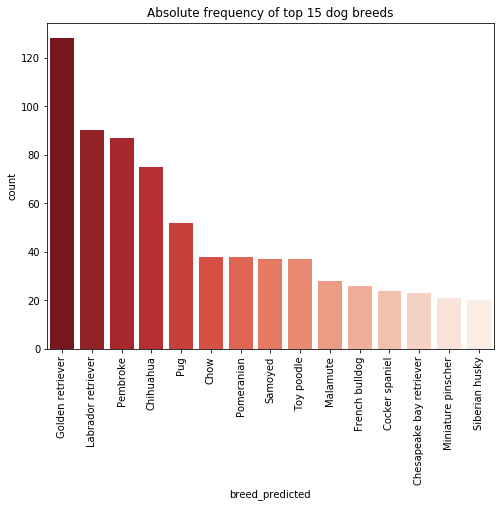

In [101]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "breed_predicted", data = twitter_df, order=twitter_df.breed_predicted.value_counts().iloc[:15].index, palette = "Reds_r")
plt.xticks(rotation=90)
plt.title("Absolute frequency of top 15 dog breeds")

Now we want to have better insights based on proportions rather than just frequency count

In [102]:
twitter_df.shape[0]

2175

Text(0.5,1,'Relative frequency of top 15 dog breed')

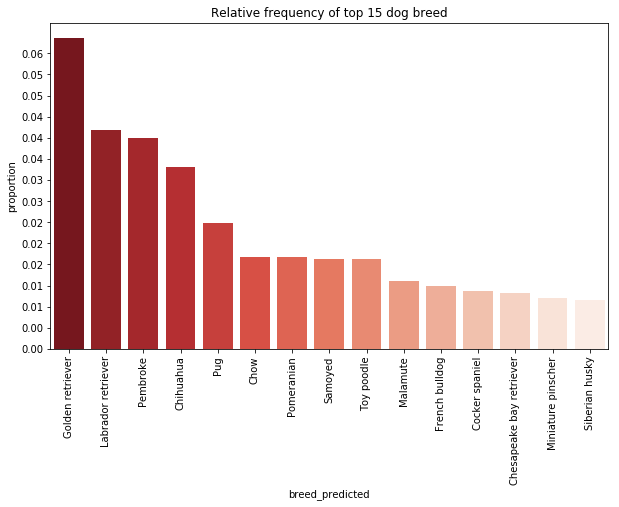

In [103]:
# Ref: https://classroom.udacity.com/nanodegrees/nd002-ent/parts/9c2eb5bf-2bda-4e0c-85bf-d997082a8571/modules/9b9bd2f7-e891-4545-adb0-e57eb8efba81/lessons/24200b64-07aa-4526-b558-df1ae31faa7c/concepts/bd9948e9-eda5-48b7-8c6f-e97192a9ac48

# get proportion taken by most common group for derivation
fig, ax = plt.subplots(figsize = (10,6))
n_points = twitter_df.shape[0]
max_count = twitter_df.breed_predicted.value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.004)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
sns.countplot(data = twitter_df, x = 'breed_predicted',order=twitter_df.breed_predicted.value_counts().iloc[:15].index, palette = "Reds_r")
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xticks(rotation=90)
plt.title("Relative frequency of top 15 dog breed")

**Insight 1 conclusion:** Golden retriever is the most frequently tweeted dog breed.

### Insight 2: Rating over the years

In [104]:
twitter_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage_name', 'favorite_count',
       'retweet_count', 'retweeted', 'min_text_range', 'max_text_range',
       'jpg_url', 'img_num', 'breed_predicted', 'confidence', 'rating'],
      dtype='object')

In [105]:
# extract year and rating from twitter_df
year = twitter_df['timestamp'].dt.year
rating = twitter_df['rating']

# inintialize a pandas dataframe
year_rating = pd.DataFrame()
year_rating['year'] = year
year_rating['rating'] = rating

In [106]:
# As there was an infinite value, we replace it with nan value and then that row is dropped
year_rating['rating'].replace(np.inf, np.nan, inplace=True)
year_rating.dropna(axis=0, inplace=True)

In [107]:
year_rating['rating'].describe()

count    2174.000000
mean        1.219593
std         4.245327
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

Text(0.5,1,'Rating over the years with their average value')

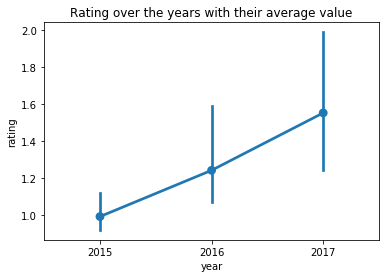

In [108]:
sns.pointplot(x='year',y='rating',data=year_rating)
plt.title('Rating over the years with their average value')

**Insight 2 conclusion:** The rating increased from 2015 to 2017 with almost 0.6 difference on their average value.

### Insight 3: realtion between dogs stages , favourite_count, and retweet_count 
**Question 1: Which breed and stage name of dogs has the highest ever favorite and retweet count in a single tweet?**


In [109]:
coveted_cols = [['stage_name', 'favorite_count','retweet_count', 'retweeted']]

In [110]:
# Create a new dataframe and fill it with data from twitter_df
dog_stage_df = pd.DataFrame()
for col in coveted_cols:
    dog_stage_df[col] = twitter_df[col]

In [111]:
# value counts of stage names
dog_stage_df.stage_name.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
None         0
Name: stage_name, dtype: int64

In [112]:
# Check which stage_name and index hsa the highest favorite count
idx_max_fav = dog_stage_df.favorite_count.idxmax()
dog_stage_df[dog_stage_df.index == idx_max_fav ]

,stage_name,favorite_count,retweet_count,retweeted
2158,puppo,132810,48265,False


In [113]:
# Check which stage_name and index hsa the highest retweet count
dog_stage_df[dog_stage_df.index == dog_stage_df.retweet_count.idxmax()]

,stage_name,favorite_count,retweet_count,retweeted
1876,doggo,131075,79515,False


In [114]:
# Breed with highest favorite count in a single tweet
twitter_df[twitter_df.index == 2158]['breed_predicted']

2158    Lakeland terrier
Name: breed_predicted, dtype: object

In [115]:
# # Breed with highest retweet count in a single tweet
twitter_df[twitter_df.index == 1876]['breed_predicted']

1876    Labrador retriever
Name: breed_predicted, dtype: object

**Relation between retweet and favorite counts**

**Question 2: How are favorite count and retweet count related?**

Text(0.5,1,'Regression plot')

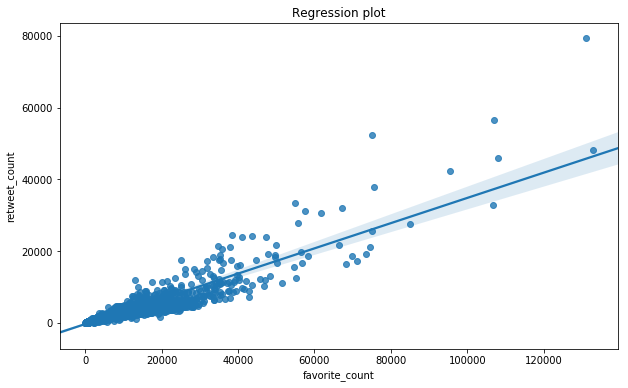

In [116]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x="favorite_count", y="retweet_count", data=dog_stage_df)
plt.title("Regression plot")

In [117]:
corr = dog_stage_df.corr().loc['retweet_count','favorite_count']
print("Correlation between'favorite_count' and  'retweet_count' is: ", corr)

Correlation between'favorite_count' and  'retweet_count' is:  0.911731653356


**Insight 3 Answers:**

1 . 
- Breed and stage name of dogs with the highest ever favorite count is `Lakeland terrier` and `puppo` respectively.
- Breed and stage name of dogs with the highest ever retweet count is `Labrador retriever` and `doggo` repectivley.


2.
- There is positive correlation (i.e. 0.912) between favorite_count and retweet_count showing that any person who like a tweet is very likley to retweet the very tweet.

## References
- RealPython website on requests library https://realpython.com/python-requests/

- https://stackoverflow.com/questions/35371043/use-python-requests-to-download-csv
- https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python#:~:text=max()%20to%20find%20the,from%20the%20previous%20result%20column%20
- https://seaborn.pydata.org/
- https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
- https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not
